In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('ADANIPORTS.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()


C:\Users\Kriti Rastogi\AppData\Local\Temp\ipykernel_14044\1324389878.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv('ADANIPORTS.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


<Axes: xlabel='Date'>

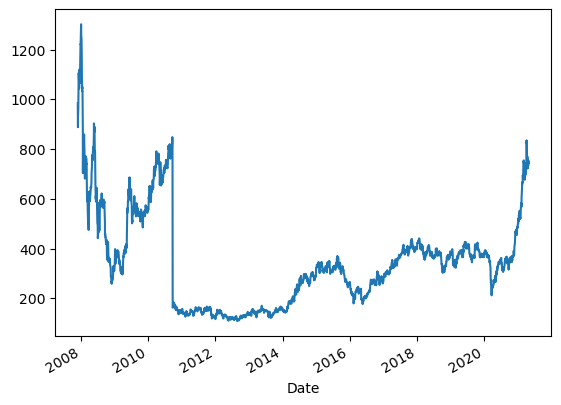

In [2]:
df['VWAP'].plot()

In [3]:
output_var=pd.DataFrame(df['VWAP'])
features=['Open','High','Low','Volume']

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
feature_transform=scaler.fit_transform(df[features])


In [5]:
feature_transform=pd.DataFrame(columns=features,data=feature_transform,index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2007-11-27,0.550634,0.774216,0.570576,0.279227
2007-11-28,0.728634,0.724774,0.659896,0.046763
2007-11-29,0.666251,0.662766,0.631554,0.052318
2007-11-30,0.650447,0.698406,0.673638,0.047054
2007-12-03,0.691828,0.728895,0.701121,0.030347


In [6]:
feature_transform.shape

(3322, 4)

In [7]:
from sklearn.model_selection import TimeSeriesSplit
timesplit=TimeSeriesSplit(n_splits=10)
for train_index,test_index in timesplit.split(feature_transform):
    X_train,X_test=feature_transform[:len(train_index)],feature_transform[len(train_index):(len(train_index)+len(test_index))]
    y_train,y_test=output_var[:len(train_index)].values.ravel(),output_var[len(train_index):(len(train_index)+len(test_index))].values.ravel()

In [8]:
print(X_train.shape)
print(X_test.shape)

(3020, 4)
(302, 4)


In [9]:
trainX=np.array(X_train)
testX=np.array(X_test)
X_train=trainX.reshape(X_train.shape[0],1,X_train.shape[1])
X_test=testX.reshape(X_test.shape[0],1,X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(3020, 1, 4)
(302, 1, 4)


In [10]:
import tensorflow as tf


In [15]:
lstm=tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32,input_shape=(1,trainX.shape[1]),activation='relu',return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error',optimizer='adam')
tf.keras.utils.plot_model(lstm,show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
history=lstm.fit(X_train,y_train,epochs=100,batch_size=8,verbose=1,shuffle=False)

Epoch 1/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 150796.2031
Epoch 2/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 142618.8125
Epoch 3/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126962.8047
Epoch 4/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 106042.5547
Epoch 5/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 84040.8516 
Epoch 6/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 63833.7539 
Epoch 7/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46979.8672 
Epoch 8/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34049.8789
Epoch 9/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24876.2461
Epoch 10/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18800.7578
Epoch 11/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14942.7549
Epoch 12/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12447.1797
Epoch 13/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10652.1494
Epoch 14/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [18]:
y_pred=lstm.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


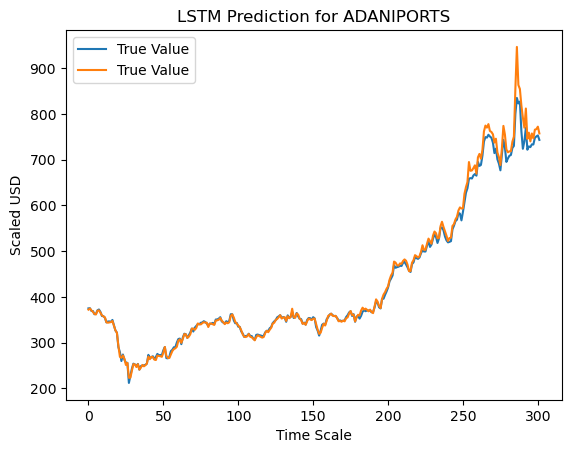

In [20]:
import matplotlib.pyplot as plt
plt.plot(y_test,label='True Value')
plt.plot(y_pred,label='True Value')
plt.title("LSTM Prediction for ADANIPORTS")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()